# 1. Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator

In [38]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

In [39]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

# 2. Reading the data

In [40]:
Data = pd.read_csv("C:/Users/User/OneDrive/Área de Trabalho/Python/column_2C_weka.csv")
pd.set_option("display.max_columns", 7)
Data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# 3. Data Preprocessing

In [41]:
# "class" to Binary data ("Abnormal" = 1, "Normal" = 0)
Data["class"] = np.where(Data["class"] == "Abnormal", 1, 0)

In [42]:
Data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


${\color{green}{\textbf{3.1 Missing Values Treatment}}}$

In [43]:
Missing_values_percent = 100*(Data.isnull().sum()/len(Data["class"]))
print(Missing_values_percent)

pelvic_incidence            0.0
pelvic_tilt numeric         0.0
lumbar_lordosis_angle       0.0
sacral_slope                0.0
pelvic_radius               0.0
degree_spondylolisthesis    0.0
class                       0.0
dtype: float64


${\color{green}{\textbf{There are NO missing values in the dataset!!}}}$

${\color{green}{\textbf{3.2 Dtypes}}}$

In [44]:
Data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int32
dtype: object

${\color{green}{\textbf{3.3 Correlation}}}$

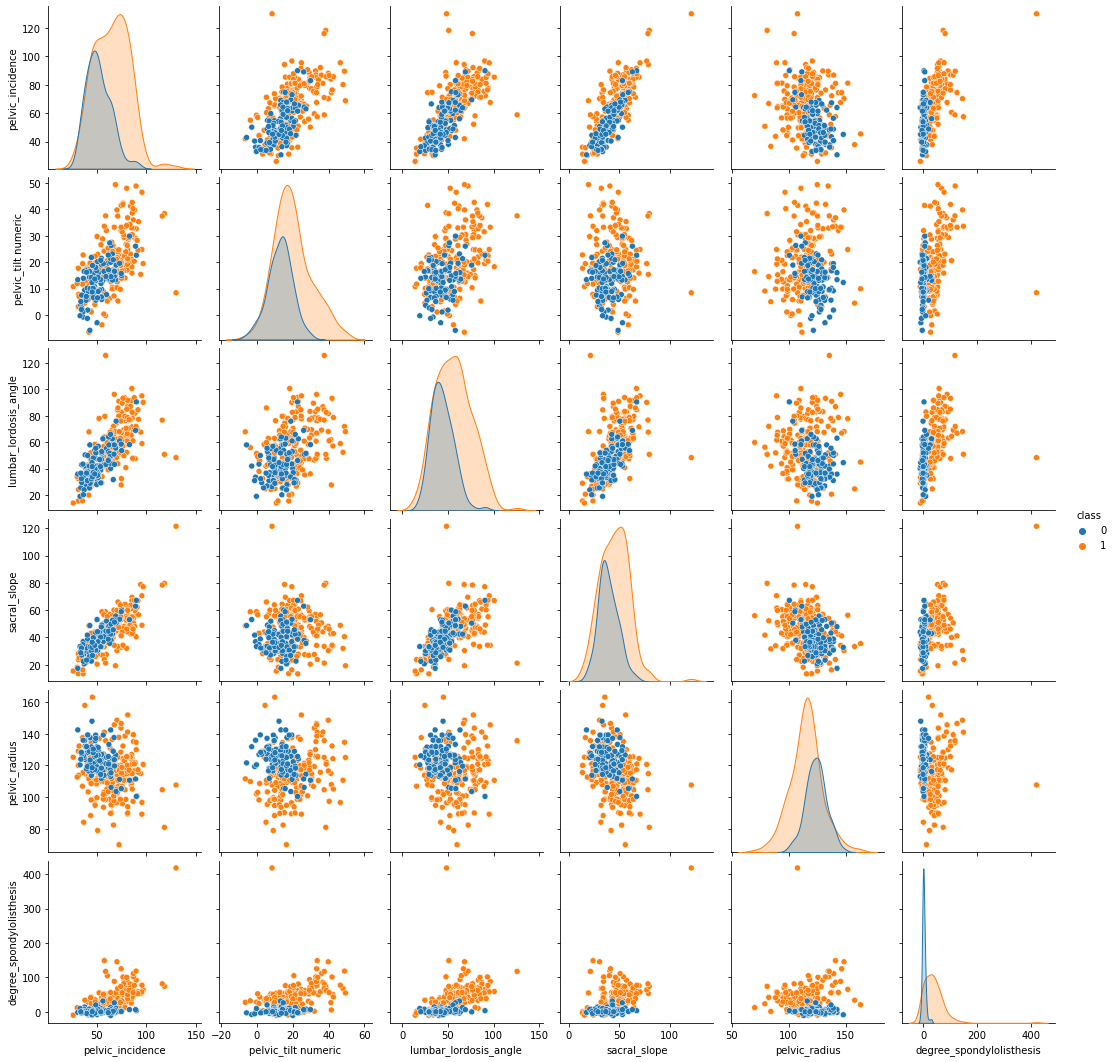

In [45]:
sbn.pairplot(Data, hue = "class")
plt.show()

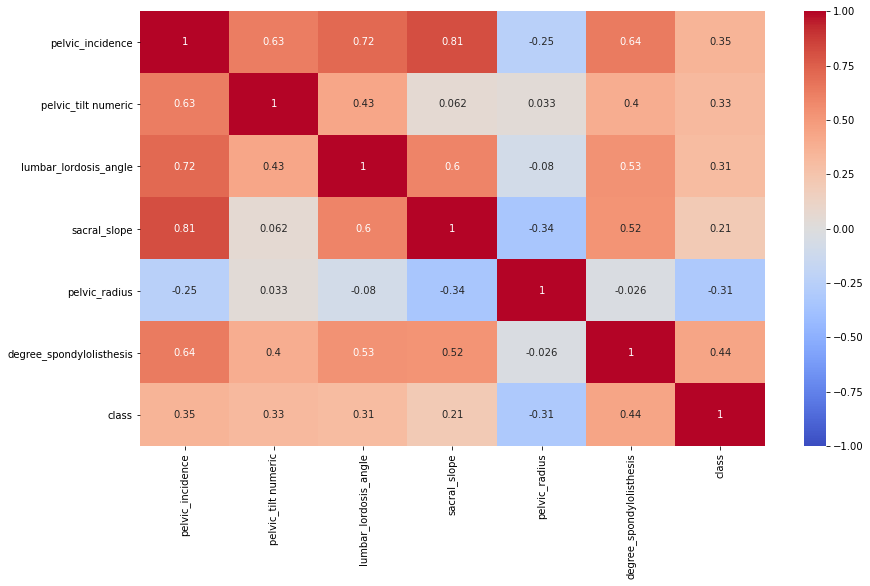

In [46]:
plt.figure(figsize = (14, 8))
sbn.heatmap(Data.corr(), annot = True, vmin = -1, cmap = "coolwarm")
plt.show()

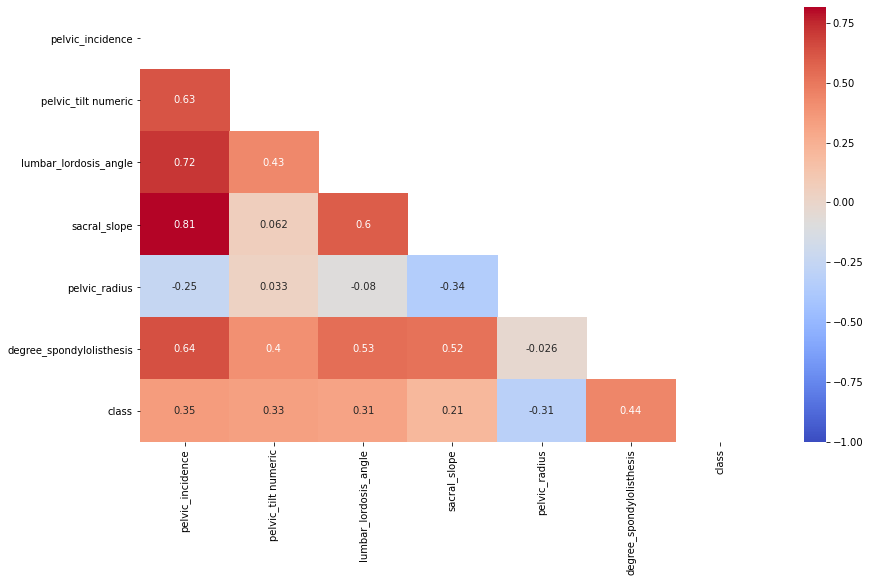

In [47]:
triu = np.triu(Data.corr())
plt.figure(figsize = (14, 8))
sbn.heatmap(Data.corr(), annot = True, vmin = -1, cmap = "coolwarm", mask = triu)
plt.show()

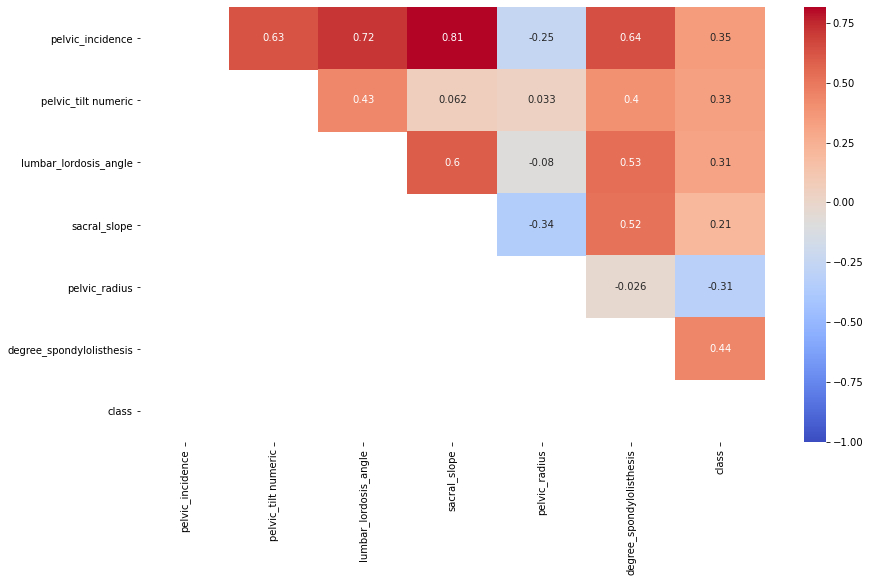

In [48]:
tril = np.tril(Data.corr())
plt.figure(figsize = (14, 8))
sbn.heatmap(Data.corr(), annot = True, vmin = -1, cmap = "coolwarm", mask = tril)
plt.show()

${\color{green}{\textbf{Pelvic incidence x Sacral slope and lumbar lordosis angle x Sacral slope}}}$

In [49]:
Font1 = {"family": "serif", "weight": "bold", "color": "darkred", "size": 16}

In [50]:
Sacral_slope = np.array(Data["sacral_slope"], dtype = float)
Pelvic_incidence = np.array(Data["pelvic_incidence"], dtype = float)
lumbar_lordosis_angle = np.array(Data["lumbar_lordosis_angle"], dtype = float)
Sacral_slope = Sacral_slope.reshape(-1, 1)
LinearModel = LinearRegression()
LinearModel2 = LinearRegression()
LinearModel.fit(Sacral_slope, Pelvic_incidence)
LinearModel2.fit(Sacral_slope, lumbar_lordosis_angle)

LinearRegression()

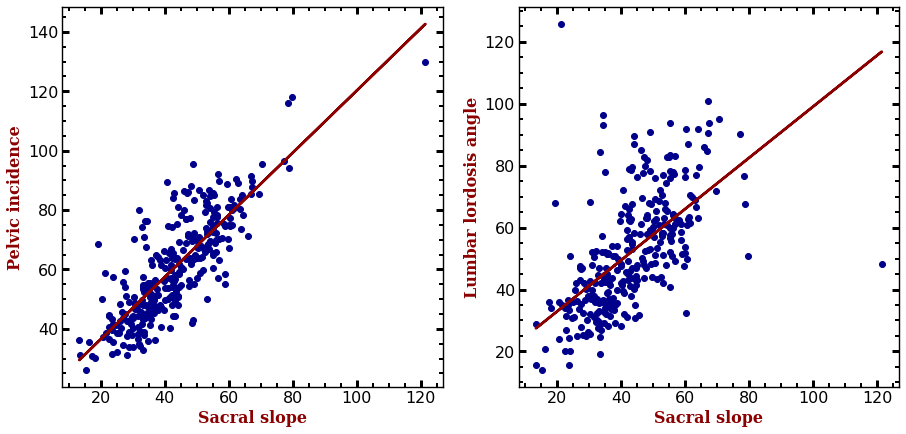

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (15, 7))
axs[0].scatter(Sacral_slope, Pelvic_incidence, marker = "o", color = "darkblue")
axs[0].plot(Sacral_slope, Sacral_slope*LinearModel.coef_ + LinearModel.intercept_, color = "darkred", linewidth = 2.6)
axs[0].set_xlabel("Sacral slope", fontdict = Font1)
axs[0].set_ylabel("Pelvic incidence", fontdict = Font1)
# minor_locator - Major_locator
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(axis = "both", direction = "in", labelcolor='black', labelsize=16, top = True, right = True)
axs[0].tick_params(which = "major", direction = "in", color='black', length=7, width = 3)
axs[0].tick_params(which = "minor", direction = "in", color='black', length=4, width = 2, top = True, right = True)
for axis in ["left", "bottom", "right", "top"]:
    axs[0].spines[axis].set_linewidth(1.4)
axs[1].scatter(Sacral_slope, lumbar_lordosis_angle, marker = "o", color = "darkblue")
axs[1].plot(Sacral_slope, Sacral_slope*LinearModel2.coef_ + LinearModel2.intercept_, color = "darkred", linewidth = 2.6)
axs[1].set_xlabel("Sacral slope", fontdict = Font1)
axs[1].set_ylabel("Lumbar lordosis angle", fontdict = Font1)
# minor_locator - Major_locator
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(axis = "both", direction = "in", labelcolor='black', labelsize=16, top = True, right = True)
axs[1].tick_params(which = "major", direction = "in", color='black', length=7, width = 3)
axs[1].tick_params(which = "minor", direction = "in", color='black', length=4, width = 2, top = True, right = True)
for axis in ["left", "bottom", "right", "top"]:
    axs[1].spines[axis].set_linewidth(1.4)
fig.patch.set_facecolor("white")  
plt.show()

${\color{green}{\textbf{3.4 Data split}}}$

In [52]:
x = Data.drop(["class"], axis = 1)
y = Data["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 9)

# 4. Models

In [53]:
Logistic_Regression = LogisticRegression()

In [54]:
penalty = ["l1", "l2", "elasticnet"]
C = np.array([0.0007, 0.001, 0.005, 0.009, 0.01])
param_grid = {"C": C, "penalty": penalty}
Grid_Logistic_Regression = GridSearchCV(estimator = Logistic_Regression, param_grid = param_grid, cv = 5, n_jobs = -1)
Grid_Logistic_Regression.fit(x_train, y_train)
print(f"C: {Grid_Logistic_Regression.best_estimator_.C} // penalty: {Grid_Logistic_Regression.best_estimator_.penalty}")

C: 0.001 // penalty: l2


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErr

In [55]:
Logistic_Regression = LogisticRegression(C =  0.001, penalty = "l2")
Logistic_Regression.fit(x_train, y_train)

LogisticRegression(C=0.001)

In [56]:
y_proba_Logistic_Regression = Logistic_Regression.predict_proba(x_test)
y_proba_Logistic_Regression = y_proba_Logistic_Regression[:, 1]

In [57]:
Bagging_Logistic_Regression = BaggingClassifier(base_estimator=Logistic_Regression, n_estimators=100,max_samples=0.5, n_jobs=-1)
Bagging_Logistic_Regression.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.001), max_samples=0.5,
                  n_estimators=100, n_jobs=-1)

In [58]:
GaussianNB = GaussianNB()
Bagging_GaussianNB = BaggingClassifier(base_estimator=GaussianNB, n_estimators=100, max_samples = 0.5, n_jobs=-1)
Bagging_GaussianNB.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(), max_samples=0.5,
                  n_estimators=100, n_jobs=-1)

In [59]:
KNN = KNeighborsClassifier()
n_neighbors = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])
p = np.array([2, 3 ,4 ,5 , 6, 7, 8, 9, 10])
metric = ["euclidean", "manhattan", "chebyshev", "minkowski"]
param_grid = {"n_neighbors": n_neighbors, "p": p, "metric": metric}
GridKNN = GridSearchCV(estimator = KNN, param_grid = param_grid, cv = 5, n_jobs=-1)
GridKNN.fit(x_train, y_train)
print(f"n_neighbors: {GridKNN.best_estimator_.n_neighbors} // p: {GridKNN.best_estimator_.p} // metric: {GridKNN.best_estimator_.metric}")

n_neighbors: 9 // p: 2 // metric: euclidean


In [60]:
KNN = KNeighborsClassifier(n_neighbors = 9,  p = 2, metric = "euclidean")
KNN.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [61]:
Bagging_KNN = BaggingClassifier(base_estimator=KNN, n_estimators=100, max_samples=0.5, n_jobs=-1)
Bagging_KNN.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(metric='euclidean',
                                                      n_neighbors=9),
                  max_samples=0.5, n_estimators=100, n_jobs=-1)

In [62]:
%%time
Random_Forest = RandomForestClassifier()
Extra_Trees = ExtraTreesClassifier()
Decision_Tree = DecisionTreeClassifier()
max_depth = np.array([9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
min_samples_split = np.array([2, 3, 4, 5, 6, 7, 8, 9])
param_grid = {"max_depth":max_depth, "min_samples_split":min_samples_split}
GridRandom_Forest = GridSearchCV(estimator = Random_Forest, param_grid = param_grid, cv = 5, n_jobs = -1)
GridExtra_Trees = GridSearchCV(estimator = Extra_Trees, param_grid = param_grid, cv =  5, n_jobs = -1)
GridDecision_Tree = GridSearchCV(estimator = Decision_Tree, param_grid = param_grid, cv =  5, n_jobs = -1)
GridRandom_Forest.fit(x_train, y_train)
GridExtra_Trees.fit(x_train, y_train)
GridDecision_Tree.fit(x_train, y_train)
print(f"Random Forest: max_depth = {GridRandom_Forest.best_estimator_.max_depth} // min_samples_split = {GridRandom_Forest.best_estimator_.min_samples_split}")
print(f"Extra Trees: max_depth = {GridExtra_Trees.best_estimator_.max_depth} // min_samples_split = {GridExtra_Trees.best_estimator_.min_samples_split}")
print(f"Decision Tree: max_depth = {GridDecision_Tree.best_estimator_.max_depth} // min_samples_split = {GridDecision_Tree.best_estimator_.min_samples_split}")

Random Forest: max_depth = 9 // min_samples_split = 3
Extra Trees: max_depth = 18 // min_samples_split = 2
Decision Tree: max_depth = 14 // min_samples_split = 2
Wall time: 50.4 s


In [63]:
Random_Forest = RandomForestClassifier(max_depth = 17, min_samples_split = 2)
Extra_Trees = ExtraTreesClassifier(max_depth = 14, min_samples_split = 3)
Decision_Tree = DecisionTreeClassifier(max_depth = 11, min_samples_split = 2)
Random_Forest.fit(x_train, y_train)
Extra_Trees.fit(x_train, y_train)
Decision_Tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11)

In [64]:
Bagging_Random_Forest = BaggingClassifier(base_estimator=Random_Forest, n_estimators=100, max_samples=0.5, n_jobs=-1)
Bagging_Extra_Trees = BaggingClassifier(base_estimator=Extra_Trees, n_estimators=100, max_samples=0.5, n_jobs=-1)
Bagging_Decision_Tree = BaggingClassifier(base_estimator=Decision_Tree, n_estimators=100, max_samples=0.5, n_jobs=-1)
Bagging_Random_Forest.fit(x_train, y_train)
Bagging_Extra_Trees.fit(x_train, y_train)
Bagging_Decision_Tree.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=11),
                  max_samples=0.5, n_estimators=100, n_jobs=-1)

In [65]:
%%time
AdaBoost = AdaBoostClassifier(n_estimators = 500)
GradientBoosting = GradientBoostingClassifier(n_estimators = 200)
learning_rate = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
min_samples_split = np.array([2, 3, 4, 5, 6])
min_samples_leaf = np.array([2 , 3 ,4 ,5 ,6])
max_depth = np.array([2 , 3 ,4 ,5 ,6 ,7])
param_grid_Adaboost = {"learning_rate": learning_rate}
param_grid_GradientBoosting = {"learning_rate": learning_rate, "min_samples_split": min_samples_split, 
                              "min_samples_leaf": min_samples_leaf, "max_depth" : max_depth}
Grid_Adaboost = GridSearchCV(estimator = AdaBoost, param_grid = param_grid_Adaboost, cv = 5, n_jobs=-1)
Grid_GradientBoosting = GridSearchCV(estimator = GradientBoosting, param_grid = param_grid_GradientBoosting, cv = 5, n_jobs=-1)
Grid_Adaboost.fit(x_train, y_train)
Grid_GradientBoosting.fit(x_train, y_train)
print(f"AdaBoost: learning_rate = {Grid_Adaboost.best_estimator_.learning_rate}")
print(f"GradientBoosting: learning_rate  = {Grid_GradientBoosting.best_estimator_.learning_rate} // min_samples_split = {Grid_GradientBoosting.best_estimator_.min_samples_split} // min_samples_leaf = {Grid_GradientBoosting.best_estimator_.min_samples_leaf}")

AdaBoost: learning_rate = 0.1
GradientBoosting: learning_rate  = 0.8 // min_samples_split = 5 // min_samples_leaf = 3
Wall time: 5min 5s


In [66]:
AdaBoost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.1)
GradientBoosting = GradientBoostingClassifier(n_estimators = 200, learning_rate  = 0.8, min_samples_split = 2, min_samples_leaf = 5)
AdaBoost.fit(x_train, y_train)
GradientBoosting.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, min_samples_leaf=5,
                           n_estimators=200)

In [67]:
Bagging_Adaboost = BaggingClassifier(base_estimator=AdaBoost, n_estimators=100,max_samples=0.5, n_jobs=-1)
Bagging_GradientBoosting = BaggingClassifier(base_estimator=GradientBoosting, n_estimators=100,max_samples=0.5, n_jobs=-1)

In [68]:
Bagging_Adaboost.fit(x_train, y_train)
Bagging_GradientBoosting.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=0.8,
                                                            min_samples_leaf=5,
                                                            n_estimators=200),
                  max_samples=0.5, n_estimators=100, n_jobs=-1)

In [69]:
GaussianNB.fit(x_train, y_train)
y_proba_Logistic_Regression = Logistic_Regression.predict_proba(x_test)
y_proba_Logistic_Regression = y_proba_Logistic_Regression[:, 1]
y_proba_GaussianNB = GaussianNB.predict_proba(x_test)
y_proba_GaussianNB = y_proba_GaussianNB[:, 1]
y_proba_KNN = KNN.predict_proba(x_test)
y_proba_KNN = y_proba_KNN[:, 1]
y_proba_Random_Forest = Random_Forest.predict_proba(x_test)
y_proba_Random_Forest = y_proba_Random_Forest[:, 1]
y_proba_ExtraTrees = Extra_Trees.predict_proba(x_test)
y_proba_ExtraTrees = y_proba_ExtraTrees[:, 1]
y_prova_Decision_Trees = Decision_Tree.predict_proba(x_test)
y_prova_Decision_Trees = y_prova_Decision_Trees[:, 1]
y_proba_Adaboost = AdaBoost.predict_proba(x_test)
y_proba_Adaboost = y_proba_Adaboost[:, 1]
y_proba_GradientBoosting = GradientBoosting.predict_proba(x_test)
y_proba_GradientBoosting = y_proba_GradientBoosting[:, 1]
y_proba_BagLogistic_Regression = Bagging_Logistic_Regression.predict_proba(x_test)
y_proba_BagLogistic_Regression = y_proba_BagLogistic_Regression[:, 1]
y_proba_BagGaussianNB = Bagging_GaussianNB.predict_proba(x_test)
y_proba_BagGaussianNB = y_proba_BagGaussianNB[:, 1]
y_proba_BagKNN = Bagging_KNN.predict_proba(x_test)
y_proba_BagKNN = y_proba_BagKNN[:, 1]
y_proba_BagRandom_Forest = Bagging_Random_Forest.predict_proba(x_test)
y_proba_BagRandom_Forest = y_proba_BagRandom_Forest[:, 1]
y_proba_BagExtraTrees = Bagging_Extra_Trees.predict_proba(x_test)
y_proba_BagExtraTrees = y_proba_BagExtraTrees[:, 1]
y_prova_BagDecision_Trees = Bagging_Decision_Tree.predict_proba(x_test)
y_prova_BagDecision_Trees = y_prova_BagDecision_Trees[:, 1]
y_proba_BagAdaboost = Bagging_Adaboost.predict_proba(x_test)
y_proba_BagAdaboost = y_proba_BagAdaboost[:, 1] 
y_proba_BagGradientBoosting = Bagging_GradientBoosting.predict_proba(x_test)
y_proba_BagGradientBoosting = y_proba_BagGradientBoosting[:, 1]

In [70]:
fpr_Logistic_Regression, tpr_Logistic_Regression, thresholds_LR = roc_curve(y_test, y_proba_Logistic_Regression)
fpr_GaussianNB, tpr_GaussianNB, thresholds_NB = roc_curve(y_test, y_proba_GaussianNB)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_proba_KNN)
fpr_Random_Forest, tpr_Random_Forest, thresholds_Random_Forest = roc_curve(y_test, y_proba_Random_Forest)
fpr_ExtraTrees, tpr_ExtraTrees, thresholds_ExtraTrees = roc_curve(y_test, y_proba_ExtraTrees)
fpr_DecisionTree, tpr_DecisionTree, thresholds_DecisionTree = roc_curve(y_test, y_prova_Decision_Trees)
fpr_Adaboost, tpr_Adaboost, thresholds_Adaboost = roc_curve(y_test, y_proba_Adaboost)
fpr_GradientBoosting, tpr_GradientBoosting, thresholds_GradientBoosting = roc_curve(y_test, y_proba_GradientBoosting)

In [71]:
fpr_BagLogistic_Regression, tpr_BagLogistic_Regression, thresholds_BagLR = roc_curve(y_test, y_proba_BagLogistic_Regression)
fpr_BagGaussianNB, tpr_BagGaussianNB, thresholds_BagNB = roc_curve(y_test, y_proba_BagGaussianNB)
fpr_BagKNN, tpr_BagKNN, thresholds_BagKNN = roc_curve(y_test, y_proba_BagKNN)
fpr_BagRandom_Forest, tpr_BagRandom_Forest, thresholds_BagRandom_Forest = roc_curve(y_test, y_proba_BagRandom_Forest)
fpr_BagExtraTrees, tpr_BagExtraTrees, thresholds_BagExtraTrees = roc_curve(y_test, y_proba_BagExtraTrees)
fpr_BagDecisionTree, tpr_BagDecisionTree, thresholds_BagDecisionTree = roc_curve(y_test, y_prova_BagDecision_Trees)
fpr_BagAdaboost, tpr_BagAdaboost, thresholds_BagAdaboost = roc_curve(y_test, y_proba_BagAdaboost)
fpr_BagGradientBoosting, tpr_BagGradientBoosting, thresholds_BagGradientBoosting = roc_curve(y_test, y_proba_BagGradientBoosting)

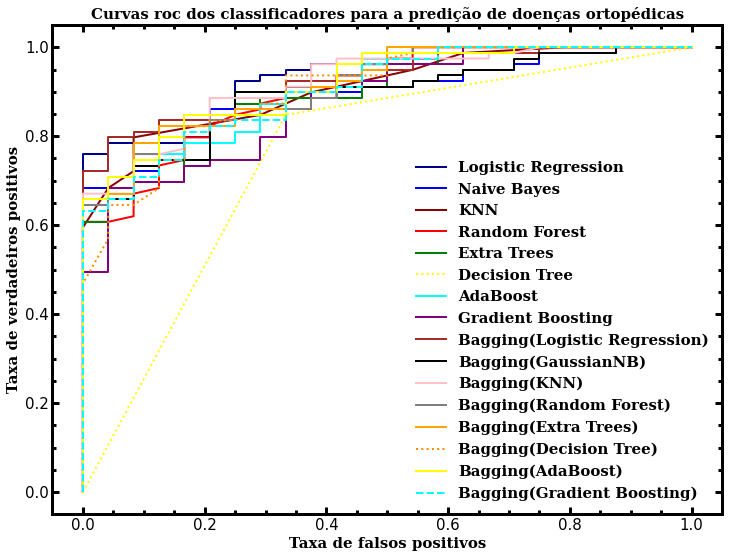

In [72]:
fig, ax = plt.subplots(figsize = (12, 9))
Fonte1 = {"family": "serif", "weight": "bold", "color": "black", "size": 15}
Fonte2 = {"family": "serif", "weight": "bold", "color": "black", "size": 15}
Fonte3 = FontProperties(family="serif",
                                   weight='bold',
                                   style='normal', 
                                     size=15)
ax.plot(fpr_Logistic_Regression, tpr_Logistic_Regression, label = "Logistic Regression", color = "darkblue", linewidth = 2)
ax.plot(fpr_GaussianNB, tpr_GaussianNB, label = "Naive Bayes", color = "blue", linewidth = 2)
ax.plot(fpr_KNN, tpr_KNN, label = "KNN", color = "darkred", linewidth = 2)
ax.plot(fpr_Random_Forest, tpr_Random_Forest, label = "Random Forest", color = "red", linewidth = 2)
ax.plot(fpr_ExtraTrees, tpr_ExtraTrees, label = "Extra Trees", color = "green", linewidth = 2)
ax.plot(fpr_DecisionTree, tpr_DecisionTree, label = "Decision Tree", color = "yellow", linewidth = 2)
ax.plot(fpr_Adaboost, tpr_Adaboost, label = "AdaBoost", color = "cyan", linewidth = 2)
ax.plot(fpr_GradientBoosting, tpr_GradientBoosting, label = "Gradient Boosting", color = "purple", linewidth = 2)
ax.plot(fpr_BagLogistic_Regression, tpr_BagLogistic_Regression, label = "Bagging(Logistic Regression)", color = "brown", linewidth = 2)
ax.plot(fpr_BagGaussianNB, tpr_BagGaussianNB, label = "Bagging(GaussianNB)", color = "black", linewidth = 2)
ax.plot(fpr_BagKNN, tpr_BagKNN, label =  "Bagging(KNN)", color = "pink", linewidth = 2)
ax.plot(fpr_BagRandom_Forest, tpr_BagRandom_Forest, label = "Bagging(Random Forest)", color = "gray", linewidth = 2)
ax.plot(fpr_BagExtraTrees, tpr_BagExtraTrees, label = "Bagging(Extra Trees)", color = "orange", linewidth = 2)
ax.plot(fpr_BagDecisionTree, tpr_BagDecisionTree, label = "Bagging(Decision Tree)", color = "darkorange", linewidth = 2)
ax.plot(fpr_BagAdaboost, tpr_BagAdaboost, label = "Bagging(AdaBoost)", color = "yellow", linewidth = 2)
ax.plot(fpr_BagGradientBoosting, tpr_BagGradientBoosting, label = "Bagging(Gradient Boosting)", color = "cyan", linewidth = 2)
ax.lines[15].set_linestyle("--")
ax.lines[13].set_linestyle(":")
ax.lines[5].set_linestyle(":")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "both", direction = "in", labelcolor='black', labelsize=15, bottom = True, left = True, top = True, right = True)
ax.tick_params(which='major', direction = "in", color='black', length=7, width = 3)
ax.tick_params(which='minor', direction = "in", length=4, color='black', width = 3, top = True, right = True, bottom = True, left = True)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3) 
plt.legend(frameon = False, prop = Fonte3)
ax.set_xlabel("Taxa de falsos positivos", fontdict = Fonte1)
ax.set_ylabel("Taxa de verdadeiros positivos", fontdict = Fonte1)
plt.title("Curvas roc dos classificadores para a predição de doenças ortopédicas", fontdict = Fonte2)
fig.patch.set_facecolor("white")
plt.legend(frameon = False, prop = Fonte3)
plt.show()